In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows (between 50–80)
num_rows = 60

# Possible values
dates = pd.date_range(start="2024-01-01", periods=num_rows, freq="D")
regions = ["East", "West", "North", "South"]
product_categories = ["A", "B", "C"]
salespersons = ["John", "Alice", "Rahul", "Sara", "David", "Priya"]

# Create DataFrame
df = pd.DataFrame({
    "Date": np.random.choice(dates, num_rows),
    "Region": np.random.choice(regions, num_rows),
    "Product Category": np.random.choice(product_categories, num_rows),
    "Units Sold": np.random.randint(5, 100, num_rows),
    "Revenue": np.random.randint(500, 10000, num_rows),
    "Salesperson": np.random.choice(salespersons, num_rows)
})

# Sort by date
df = df.sort_values(by="Date").reset_index(drop=True)

# Save files
df.to_csv("sales_data.csv", index=False)


In [5]:
# first few rows of dataset
df.head(15)

,Date,Region,Product Category,Units Sold,Revenue,Salesperson
0,2024-01-02,West,A,96,4782,John
1,2024-01-02,South,B,48,7625,Alice
2,2024-01-03,South,A,62,4561,Rahul
3,2024-01-03,East,A,10,3431,David
4,2024-01-04,West,C,63,3608,David
5,2024-01-07,East,B,43,9315,David
6,2024-01-08,East,A,33,5749,John
7,2024-01-09,North,A,7,2549,John
8,2024-01-11,South,C,32,702,Priya
9,2024-01-11,North,C,90,4010,Sara


In [9]:
#check for missing values
df.isnull().sum()

Date                0
Region              0
Product Category    0
Units Sold          0
Revenue             0
Salesperson         0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().any()

False

##### No Issues were found
##### Final dataset is clean, structured and analysis ready

#### Total Revenue by Region

In [37]:
Revenue_by_region = df.groupby("Region")["Revenue"].sum()
print(Revenue_by_region)

Region
East      60162
North     45155
South     95813
West     124496
Name: Revenue, dtype: int32


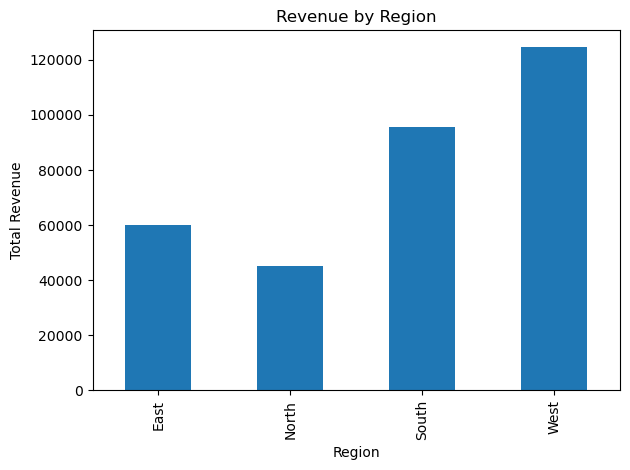

In [39]:
Revenue_by_region.plot(kind='bar')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

#### Top 3 Salesperson by Revenue

In [21]:
# Calculate total revenue by salesperson
top_3_salespersons = (
    df.groupby("Salesperson")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print(top_3_salespersons)


Salesperson
Priya    85422
Sara     61530
Rahul    57210
Name: Revenue, dtype: int32


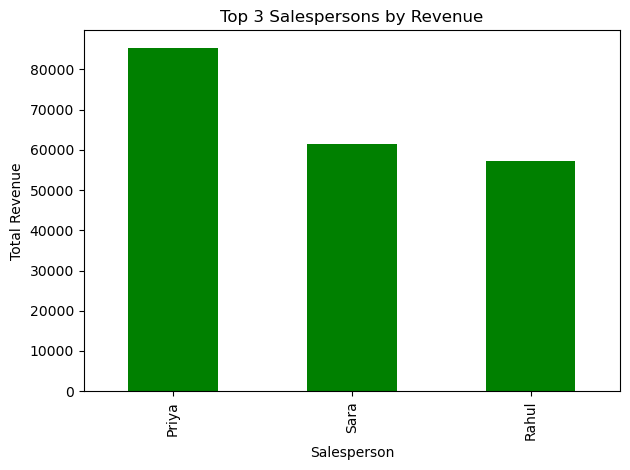

In [23]:
plt.figure()
top_3_salespersons.plot(kind="bar", color ="green")
plt.title("Top 3 Salespersons by Revenue")
plt.xlabel("Salesperson")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

#### Best Performing Product Category

In [25]:
# Calculate total revenue by product category
best_product_category = (
    df.groupby("Product Category")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

print(best_product_category)
print("\nBest Performing Product Category:", best_product_category.idxmax())


Product Category
C    132355
A    126395
B     66876
Name: Revenue, dtype: int32

Best Performing Product Category: C


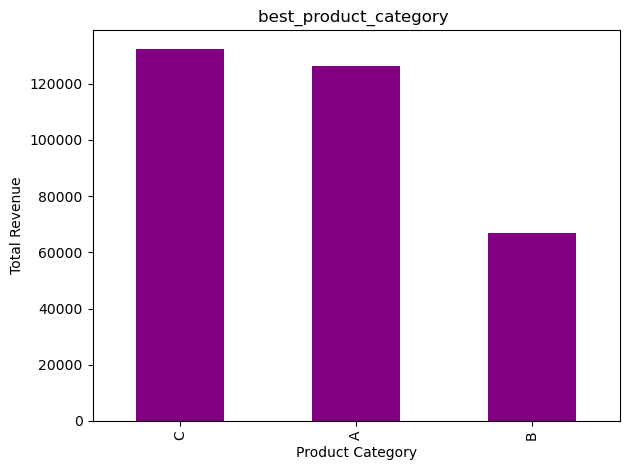

In [29]:
plt.figure()
best_product_category.plot(kind="bar", color="purple")
plt.title("best_product_category ")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

#### Revenue share by Product Category

In [25]:
# Total revenue by product category
revenue_by_category = df.groupby("Product Category")["Revenue"].sum()

# Calculate revenue share (percentage)
revenue_share = (revenue_by_category / revenue_by_category.sum()) * 100

print(revenue_share)


Product Category
A    38.816004
B    20.537672
C    40.646324
Name: Revenue, dtype: float64


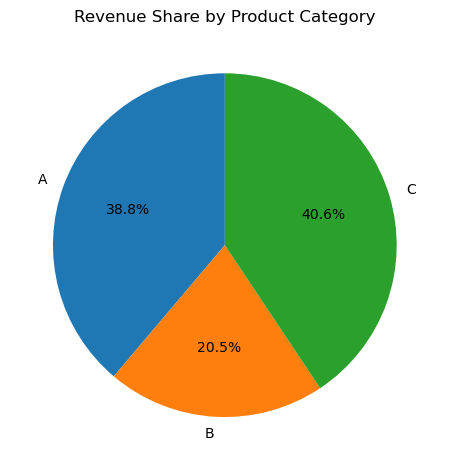

In [27]:
plt.figure()
revenue_by_category.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Revenue Share by Product Category")
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()

#### Summary

##### West Region generated the highest revenue, while North Region had the lowest revenue. The top 3 Salespersons by Revenue are Priya, Sara and Rahul.
##### The best performing product categories are C ,A  and then B. 
##### Product category 'C' generated the highest revenue share while product category 'B' had lowest revenue share.
##### Product categories and regions with the lowest revenue contribution require deeper analysis to identify performance gaps.
##### Addressing these gaps can support targeted improvement strategies.